# An Introduction to Deep Learning using nolearn

<img src='Deep_Learning.jpg', width = 1000, height = 400>
[Source](http://www.purdue.edu/newsroom/releases/2014/Q1/smartphone-to-become-smarter-with-deep-learning-innovation.html)

One of the most well known problems in machine learning regards how to categorize [handwritten numbers](http://en.wikipedia.org/wiki/MNIST_database) automatically. Basically, the idea is that you have 10 different digits (0-9) and you want a computer to be able to correctly identify each number. This would come in handy at the post office, along with many other applications such as identifying address numbers in images. 

Different machine learning experts have worked on this problem for several years trying [a variety of approaches](http://yann.lecun.com/exdb/mnist/). Ultimately, however, the best algorithm for the task of image classification would be an algorithm that can fit features that aren't easily described. This is where neural networks truly shine. 

Deep learning has become quite the trendy subject recently. Here is an [example](http://venturebeat.com/2015/02/09/microsoft-researchers-say-their-newest-deep-learning-system-beats-humans-and-google/). Essentially, researchers are trying to use Deep Learning to categorize images better than a human could, something humans are typically better at doing naturally than a computer. 

If you want an idea as to how Deep Learning is being used (and how it works) listening to a talk from Dr. Andrew Ng is always a good idea!

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZmNOAtZIgIk')

Basically, the key part of deep learning is finding features that can be used for classification from UNLABELED training examples. More data = a more accurate model, most of the time. Labeling the myriad of images available on the web one at a time into categories would be very difficult and time consuming (although Amazon paid people money to do this through their [Mechnical Turk](https://www.mturk.com/mturk/welcome) program). Instead, just find features from your unlabeled images (such as certain curves, color gradients, or other features that humans would have a difficult time describing). Then, use these features to help categorize your images. It greatly improves the accuracy because now you have more data to work with!

As a way of practicing this, we are going to use some Deep Learning on the MNIST dataset of numbers to see if we can get a low error rate. I couldn't decide which neural network library to use at first, since scikit-learn doesn't really have any. I became inspired by this post [here](http://www.pyimagesearch.com/2014/09/22/getting-started-deep-learning-python/) from Dr. Adrian Rosebrock. He used the library [nolearn](https://pythonhosted.org/nolearn/), which we will also be using. 

I just found out while writing this that the dbn class of nolearn is being removed entirely for the new version 0.6 and that the author suggests switching to [lasagne](https://github.com/dnouri/nolearn/blob/master/nolearn/lasagne.py). If you are going to follow along with this notebook, make sure you have a version prior to nolearn 0.6. 

## Processing the Images

Just to get a starting idea of where we are beginning, let's try a very basic run of a deep belief network using nolearn. Because image processing can be fairly memory intensive, I am including the key steps of processing the data and wrapping them inside a function.

Our function will load the MNIST data, transform it to a 0 to 1 scale for all of the pixel intensity values, and finally split the data into train and test sets. We need to scale the data between 0 to 1 so that the neural network will perform more efficiently. 

In [4]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import train_test_split

In [11]:
def train_test_prep():
    '''
    This function will load the MNIST data, scale it to a 0 to 1 range, and split it into test/train sets. 
    '''
    
    image_data = fetch_mldata('MNIST Original') # Get the MNIST dataset.
    
    basic_x = image_data.data
    basic_y = image_data.target # Separate images from their final classification. 
    
    min_max_scaler = MinMaxScaler() # Create the MinMax object.
    basic_x = min_max_scaler.fit_transform(basic_x.astype(float)) # Scale pixel intensities only.
    
    x_train, x_test, y_train, y_test = train_test_split(basic_x, basic_y, 
                                                    test_size = 0.2, random_state = 0) # Split training/test.
    return x_train, x_test, y_train, y_test

Now, let's run our function to split the data and scale it.

In [12]:
x_train, x_test, y_train, y_test = train_test_prep()

## Creating A Deep Belief Network

Given that we now have train/test data, let's try making a simple deep belief network and get a baseline error rate to start with.

In [5]:
from nolearn.dbn import DBN

gnumpy: failed to import cudamat. Using npmat instead. No GPU will be used.


Notice that our version is not using cudamat. It would run a lot faster if we had a nice GPU to use, but since I am on a laptop that doesn't have a nice one, we are going to run this using the slower, CPU way. 

In [7]:
dbn_model = DBN([x_train.shape[1], 300, 10],
                learn_rates = 0.3,
                learn_rate_decays = 0.9,
                epochs = 10,
                verbose = 1)

We are using the example settings shown in the [documentation](https://pythonhosted.org/nolearn/dbn.html) just as a benchmark. So what do all of these settings mean?

- The first row allows us to set the number of layers and nodes. Our input layer has 784 nodes, which is the number of pixels in each image. Our second layer, which is a hidden layer, has 300 nodes. These 300 nodes will become our unsupervised feature vector. This layer of nodes is then fed to the output layer, which has 10 nodes. One node for each possible digit (0-9). 

- The second row specifies the learning rate, which is essentially how large a step we are taking during gradient descent. Smaller steps mean a possibly more accurate result, but the training will take longer.

- The learn_rate_decays specifies a factor the initial learning rate will be multiplied by after each iteration of the training. 

- Epochs is just a fancy way of saying the number of times the network will iterate over all of the training examples to minimize the cost function. More epochs is better, but it takes longer. 

- Verbose lets us see the progress of the deep belief network's training. Neural networks are slow to train! Especially compared to other machine learning algorithms. 

Now it is time to train our deep belief network. This could take a little bit . . .

In [8]:
dbn_model.fit(x_train, y_train)

[DBN] fitting X.shape=(56000L, 784L)
[DBN] layers [784L, 300, 10]
[DBN] Fine-tune...

100%



Epoch 1:

100%



  loss 0.279465978376
  err  0.0809107142857
  (0:00:18)
Epoch 2:

100%



  loss 0.167409065944
  err  0.046625
  (0:00:18)
Epoch 3:

100%



  loss 0.132460369157
  err  0.0375357142857
  (0:00:18)
Epoch 4:

100%



  loss 0.0866091957473
  err  0.0255178571429
  (0:00:18)
Epoch 5:

100%



  loss 0.0682315404487
  err  0.0213928571429
  (0:00:17)
Epoch 6:

100%



  loss 0.0499247853743
  err  0.0155892857143
  (0:00:18)
Epoch 7:

100%



  loss 0.0399979346272
  err  0.0127142857143
  (0:00:17)
Epoch 8:

100%



  loss 0.0325180868268
  err  0.00998214285714
  (0:00:17)
Epoch 9:

100%



  loss 0.0249244378868
  err  0.00791071428571
  (0:00:17)
Epoch 10:
  loss 0.0177347917291
  err  0.00503571428571
  (0:00:18)


After about 3 and a half minutes, our network is ready! Let's see how accurate it is on the test data, just to get an idea of where we are starting from. 

In [6]:
from sklearn.metrics import classification_report, accuracy_score

In [10]:
y_true, y_pred = y_test, dbn_model.predict(x_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit
print 'The accuracy is:', accuracy_score(y_true, y_pred)

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.99      1312
        1.0       0.99      0.98      0.99      1604
        2.0       0.98      0.98      0.98      1348
        3.0       0.98      0.97      0.98      1427
        4.0       0.98      0.98      0.98      1362
        5.0       0.97      0.98      0.97      1280
        6.0       0.99      0.99      0.99      1397
        7.0       0.98      0.98      0.98      1461
        8.0       0.97      0.98      0.98      1390
        9.0       0.97      0.97      0.97      1419

avg / total       0.98      0.98      0.98     14000

The accuracy is: 0.9795


So, our starting accuracy is pretty close to 98% at 97.95%. It looks like the model is doing a good job, but it is having more trouble with the number 5 and 9 based on the lower f1-scores for those two numbers. Is there any way we can boost our score? 

Well, it would be nice if we had more images we could work with. That way, we could fit the missed examples better. There is a way we can solve this problem: create our own training examples!

This is a common solution in the area of image classification. Some of the handwritten images may not be aligned correctly, or may be slightly rotated. To account for this in the model, let's add some "noise" to our training set and see if we can improve some. In addition, let's try using some more advanced features of the Deep Belief Network, such as more epochs and some regularization to avoid overfitting. 



## Artificial Training Examples

To augment the size of our training set, we need to create a function that will change our original images just a little bit. We want to include a bit of translation (moving the pixels around) and rotation, both at random. To see how this will work, let's create a function that will randomly alter an existing training example.

First, let's take a look at one of the training examples, reverting it back to its original form and plotting it.

In [21]:
import matplotlib.pyplot as plt

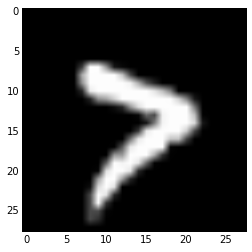

In [22]:
sample = np.reshape(x_train[0], ((28,28))) # Get the training data back to its original form.
sample = sample*255. # Get the original pixel values.
plt.imshow(sample, cmap = plt.cm.gray)

We can see this is clearly a 7. Now, let's make our function that will rotate and translate the image and view the sample again.

In [7]:
from scipy.ndimage import convolve, rotate

In [8]:
def random_image_generator(image):
    '''
    This function will randomly translate and rotate an image, producing a new, altered version as output.
    '''
    
    # Create our movement vectors for translation first. 
    
    move_up = [[0, 1, 0],
              [0, 0, 0],
              [0, 0, 0]]
    
    move_left = [[0, 0, 0],
                 [1, 0, 0],
                 [0, 0, 0]]
    
    move_right = [[0, 0, 0],
                  [0, 0, 1],
                  [0, 0, 0]]
                               
    move_down = [[0, 0, 0],
                 [0, 0, 0],
                 [0, 1, 0]]
    
    # Create a dict to store these directions in.
    
    dir_dict = {1:move_up, 2:move_left, 3:move_right, 4:move_down}
    
    # Pick a random direction to move.
    
    direction = dir_dict[np.random.randint(1,5)]
    
    # Pick a random angle to rotate (10 degrees clockwise to 10 degrees counter-clockwise).
    
    angle = np.random.randint(-10,11)
    
    # Move the random direction and change the pixel data back to a 2D shape.
    
    moved = convolve(image.reshape(28,28), direction, mode = 'constant')
    
    # Rotate the image
    
    rotated = rotate(moved, angle, reshape = False)
    
    return rotated
    

Now what happens to the image if we change it randomly?

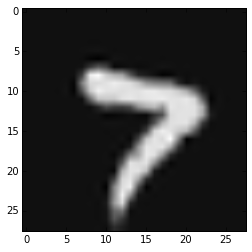

In [24]:
distorted_example = random_image_generator(x_train[0]*255.)
plt.imshow(distorted_example, cmap = plt.cm.gray)

What you see will vary if you are using this notebook interactively (since the distortions are random), but in this case the 7 is more upright now and slightly lower. 

In theory we could make an infinite number of these artifical training examples to help improve our Deep Belief Network (if we had a lot of memory of course!) 

To make sure we don't run out of memory, let's create a function that will augment our training set internally with an additional amount of artifical examples. It will call the random_image_generator function inside itself.

In [9]:
def extra_training_examples(features, targets, num_new):
    '''
    This function will take the training set and increase it by artifically adding new training examples.
    We can also specify how many training examples we wish to add with the num_new parameter.
    '''
    
    # First, create empty arrays that will hold our new training examples.
    
    x_holder = np.zeros((num_new, features.shape[1]))
    y_holder = np.zeros(num_new)
    
    # Now, loop through our training examples, selecting them at random for distortion.
    
    for i in xrange(num_new):
        # Pick a random index to decide which image to alter.
        
        random_ind = np.random.randint(0, features.shape[0])
        
        # Select our training example and target.
        
        x_samp = features[random_ind]
        y_samp = targets[random_ind]
        
        # Change our image and convert back to 1D.
        
        new_image = random_image_generator(x_samp).ravel()
        
        # Store these in our arrays.
        
        x_holder[i,:] = new_image
        y_holder[i] = y_samp

    # Now that our loop is over, combine our original training examples with the new ones.
    
    combined_x = np.vstack((features, x_holder))
    combined_y = np.hstack((targets, y_holder))
        
        # Return our new training examples and targets.
        
    return combined_x, combined_y
        
        
    

Let's now make our new x_train and y_train objects and replace the old ones with these new, larger ones.

In [13]:
x_train, y_train = extra_training_examples(x_train, y_train, 10000)

Originally, we had 56,000 training examples. Now how many do we have?

In [14]:
x_train.shape[0]

66000L

Good it worked. Now let's try running our same DBN model again with the expanded training set to see if we can improve our accuracy at all.
Let's use the same settings as last time.

In [20]:
dbn_model = DBN([x_train.shape[1], 300, 10],
                learn_rates = 0.3,
                learn_rate_decays = 0.9,
                epochs = 10) # I am turning off the verbose statements this time.

dbn_model.fit(x_train, y_train)
y_true, y_pred = y_test, dbn_model.predict(x_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit
print 'The accuracy is:', accuracy_score(y_true, y_pred)


             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1312
        1.0       0.98      0.99      0.99      1604
        2.0       0.97      0.98      0.97      1348
        3.0       0.98      0.97      0.98      1427
        4.0       0.99      0.96      0.97      1362
        5.0       0.98      0.97      0.97      1280
        6.0       0.99      0.99      0.99      1397
        7.0       0.99      0.97      0.98      1461
        8.0       0.95      0.98      0.97      1390
        9.0       0.95      0.97      0.96      1419

avg / total       0.98      0.98      0.98     14000

The accuracy is: 0.976857142857


Now hold on a minute! Our accuracy actually went DOWN a bit from 97.95% to 97.69%. The F1-scores have dropped for several numbers, especially our 9s. 

So what went wrong?

Well there are several possibilities, but a likely candidate in this case is that our additional noise confused the model. In other words, we are underfitting now and we need to make the Network either more complex (additional hidden nodes), decrease the learning rate, or train it longer (more epochs). In the next section we shall try all three to see if that helps.

## Tuning the Network

Because of our larger training set, we need to make some changes to our original Deep Belief Network. Next, we are going to try this again with three changes:

- Decrease our learning rate from 0.3 to 0.2 for smaller steps during gradient descent
- Increase the number of hidden nodes from 300 to 500
- Increase the number of training epochs from 10 to 50

After doing these changes, we should be able to get a better result. The downside is that model training will now take longer. Be prepared to wait a little while for this model to finish (my laptop ended up taking about 30 minutes). This might be a good time to watch the Deep Learning video from the beginning if you haven't already.

In [21]:
dbn_model = DBN([x_train.shape[1], 500, 10], # Increased the hidden nodes to add more complex features.
                learn_rates = 0.2, # Smaller steps for gradient descent.
                learn_rate_decays = 0.9,
                epochs = 50) # Give the model more time to converge.

dbn_model.fit(x_train, y_train)
y_true, y_pred = y_test, dbn_model.predict(x_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit
print 'The accuracy is:', accuracy_score(y_true, y_pred)

             precision    recall  f1-score   support

        0.0       0.99      0.99      0.99      1312
        1.0       0.99      0.99      0.99      1604
        2.0       0.98      0.98      0.98      1348
        3.0       0.98      0.98      0.98      1427
        4.0       0.98      0.98      0.98      1362
        5.0       0.99      0.97      0.98      1280
        6.0       0.99      0.99      0.99      1397
        7.0       0.98      0.98      0.98      1461
        8.0       0.98      0.98      0.98      1390
        9.0       0.98      0.97      0.98      1419

avg / total       0.98      0.98      0.98     14000

The accuracy is: 0.983714285714


Well that certainly helped! Our overall accuracy went up to 98.37%, with increases in many of the f1-scores, especially for the 9 digit. However, with our added model complexity, it is likely our network overfit (neural networks tend to do this quite well!) There is a way we can correct for this to see if we can get just a little more accuracy. Most other machine learning algorithms that overfit can have this corrected through regularization. For neural networks, that means something called "dropout," where we randomly disconnect a certain percentage of our nodes.  

## Regularization of The Network: Dropout

Fortunately, nolearn has a parameter we can set to do this quite easily (we will just have to wait a while while our model is trained again!) Let's load our model object, this time with an added parameter for dropout. We will choose 25% (I found this to work well from some limited testing).  

In [17]:
dbn_model = DBN([x_train.shape[1], 500, 10], 
                learn_rates = 0.2, 
                learn_rate_decays = 0.9,
                dropouts = 0.25, # Express the percentage of nodes that will be randomly dropped as a decimal.
                epochs = 50) 

dbn_model.fit(x_train, y_train)
y_true, y_pred = y_test, dbn_model.predict(x_test) # Get our predictions
print(classification_report(y_true, y_pred)) # Classification on each digit
print 'The accuracy is:', accuracy_score(y_true, y_pred)

             precision    recall  f1-score   support

        0.0       0.99      1.00      0.99      1312
        1.0       0.99      0.99      0.99      1604
        2.0       0.98      0.99      0.98      1348
        3.0       0.99      0.98      0.98      1427
        4.0       0.99      0.99      0.99      1362
        5.0       0.99      0.97      0.98      1280
        6.0       0.99      0.99      0.99      1397
        7.0       0.98      0.98      0.98      1461
        8.0       0.98      0.99      0.98      1390
        9.0       0.98      0.98      0.98      1419

avg / total       0.99      0.99      0.99     14000

The accuracy is: 0.985357142857


Once again, we can see that our accuracy went up to 98.54%, and the dropout regularization prevented some of the overfitting! That's probably about the best we are going to be able to do given the constraints of using a laptop (locally that is: no cloud computing). What else could be done to increase performance? 

## Ideas for Improvement and Summary

In this notebook, we examined a somewhat simplistic application of deep learning to classify images of numbers from the MNIST dataset. We tried several techniques to improve the performance of our classifier, such as augmentation of the training set with our own artificial examples, changing the learning rate, and adding additional hidden units. We also explored dropout to prevent overfitting of the network. In the end, we were able to get decent performance out of our Deep Belief Network, improving our initial accuracy from 97.95% to 98.54% and increasing the f1 score for most of our classification categories. 

Possible ideas for improvement:

- Try utilizing a GPU (graphics processing unit) to train our network instead. Neural networks tend to be much faster when using one (or several!) You could either configure nolearn with cudamat on a remote instance such as AWS (Amazon Web Services) or use a graphics card on a more powerful desktop computer. Adrian Rosebrook's post experiments with that [here](http://www.pyimagesearch.com/2014/10/13/deep-learning-amazon-ec2-gpu-python-nolearn/).

- Experiment with different parameters for further fine tuning. We could try increasing the number of layers for further complexity or increasing the number of epochs.

- Try a larger number of artificial examples (if we have more memory available) to see how that improves the accuracy further. Doing so with enough additional examples should make pushing 99% accuracy a reality.

